ΟΜΑΔΑ:

Ράμμος Θωμάς         -- 4583

Βασιλική Τόλη        -- 4812

In [1]:
!pip install -U scikit-learn
!pip install keras
!pip install tensorflow
!pip install scikit-image

In [1]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree, ensemble

from tensorflow.keras.datasets import fashion_mnist
from skimage.measure import block_reduce
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Περιγραφή κλάσης 
1) load_data(self):
Αυτή η μέθοδος φορτώνει το σύνολο δεδομένων Fashion MNIST, το οποίο περιέχει εικόνες ενδυμάτων και αντίστοιχες ετικέτες κατηγοριών. Επιστρέφει δύο tuples που περιέχουν τα δεδομένα εκπαίδευσης και ελέγχου, καθώς και τις αντίστοιχες ετικέτες.

2) preprocess_data(self, x_train, x_test):
Αυτή η μέθοδος προεπεξεργάζεται τα δεδομένα εισόδου με την κανονικοποίηση των τιμών τους μεταξύ 0 και 1. Χρησιμοποιεί τη διαίρεση των δεδομένων εισόδου με το 255.0 για να επιτύχει αυτή την κανονικοποίηση.

3) reshape_data(self, x_train, x_test):
Αυτή η μέθοδος αλλάζει τη μορφή των δεδομένων από μια δισδιάστατη μορφή σε μια τρισδιάστατη μορφή. Αυτή η αλλαγή μορφής απαιτείται για την είσοδο του δεδομένου σε ένα συγκεκριμένο μοντέλο δικτύου νευρώνων.

4) apply_max_pooling(self, x_train, x_test, block_size=(1, 4, 4)):
Αυτή η μέθοδος εφαρμόζει την τεχνική max pooling στα δεδομένα. Το max pooling είναι μια τεχνική υποδειγματοληψίας που μειώνει τη διάσταση των δεδομένων εισόδου επιλέγοντας το μέγιστο στοιχείο από κάθε υπο-πλαίσιο.

Αυτές οι μέθοδοι συνδυάζονται για τη φόρτωση, προεπεξεργασία και επεξεργασία των δεδομένων εκπαίδευσης και ελέγχου πριν χρησιμοποιηθούν για εκπαίδευση ενός μοντέλου μηχανικής μάθησης ή βαθιάς μάθησης.

In [2]:
class LoadData:
    def __init__(self):
        pass

    def load_data(self):
        """
        Loads the Fashion MNIST dataset.

        Returns:
            Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test)
        """
        (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
        return (x_train, y_train), (x_test, y_test)

    def preprocess_data(self, x_train, x_test):
        """
        Preprocesses the input data.

        Args:
            x_train: Numpy array, training data.
            x_test: Numpy array, testing data.

        Returns:
            Tuple of preprocessed Numpy arrays: (x_train_processed, x_test_processed)
        """
        x_train_processed = x_train / 255.0
        x_test_processed = x_test / 255.0
        return x_train_processed, x_test_processed
    
    def reshape_data(self, x_train, x_test):
        """
        Reshapes the input data.

        Args:
            x_train: Numpy array, training data.
            x_test: Numpy array, testing data.

        Returns:
            Tuple of reshaped Numpy arrays: (x_train_reshaped, x_test_reshaped)
        """
        x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
        x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
        return x_train_reshaped, x_test_reshaped
    
    def reshape_data_to_image(self, x_train, x_test):
        """
        Reshapes the reshaped data to image size 28x28.

        Args:
            x_train: Numpy array, training data.
            x_test: Numpy array, testing data.

        Returns:
            Tuple of reshaped Numpy arrays: (x_train_images, x_test_images)
        """ 
        x_train_images = x_train.reshape(-1,28,28)
        x_test_images = x_test.reshape(-1,28,28)
        return x_train_images, x_test_images
    
    def apply_max_pooling(self, x_train, x_test, block_size=(1, 4, 4)):
        """
        Applies max pooling to the input data.

        Args:
            x_train: Numpy array, training data.
            x_test: Numpy array, testing data.
            block_size: Tuple, size of the blocks for pooling.

        Returns:
            Tuple of pooled Numpy arrays: (x_train_pooled, x_test_pooled)
        """
        
        x_train_pooled = block_reduce(x_train, block_size=block_size, func=np.max)
        x_test_pooled = block_reduce(x_test, block_size=block_size, func=np.max)
        return x_train_pooled, x_test_pooled
    
    def reshape_pool_data(self, x_train, x_test):
        """
        Reshapes the image max pooling data.

        Args:
            x_train: Numpy array, training data.
            x_test: Numpy array, testing data.
            block_size: Tuple, size of the blocks for pooling.

        Returns:
            Tuple of pooled Numpy arrays: (x_train_vectorized,x_test_vectorized)
        """
        
        x_train_vectorized = x_train.reshape(x_train_pooled.shape[0], -1)
        x_test_vectorized = x_test.reshape(x_test_pooled.shape[0], -1)
        return x_train_vectorized,x_test_vectorized

In [3]:
# Instantiate the LoadData class
data_loader = LoadData()

# Load data
(x_train, y_train), (x_test, y_test) = data_loader.load_data()

# Preprocess data
x_train_processed, x_test_processed = data_loader.preprocess_data(x_train, x_test)

# Reshape data
x_train_reshaped, x_test_reshaped = data_loader.reshape_data(x_train_processed, x_test_processed)

# Reshape to image 28x28
x_train_images, x_test_images = data_loader.reshape_data_to_image(x_train_reshaped, x_test_reshaped)

# Apply max pooling
x_train_pooled, x_test_pooled = data_loader.apply_max_pooling(x_train_images, x_test_images)

# Reshape pooled data
x_train_vectorized, x_test_vectorized = data_loader.reshape_pool_data(x_train_pooled, x_test_pooled)


# NearestNeighborClassifier:
H κλάση NearestNeighborClassifier είναι ένας απλοποιημένος ταξινομητής βάσει της μεθόδου των k-κοντινότερων γειτόνων (k-NN). Η κλάση αρχικοποιείται με τέσσερις παραμέτρους: x_train, y_train, x_test, y_test, οι οποίες αντιστοιχούν στα δεδομένα εκπαίδευσης και δοκιμής για τα χαρακτηριστικά και τις ετικέτες αντίστοιχα.

Στη μέθοδο classify, πραγματοποιείται η διαδικασία ταξινόμησης. Η μέθοδος εκτυπώνει τον τύπο του ταξινομητή και δοκιμάζει τρία διαφορετικά k (1, 3, και 5). Για κάθε k, δημιουργείται ένα μοντέλο k-NN χρησιμοποιώντας την απόσταση Minkowski με p=2 (ισοδύναμο με την ευκλείδεια απόσταση). Το μοντέλο εκπαιδεύεται με τα δεδομένα εκπαίδευσης και στη συνέχεια χρησιμοποιείται για την πρόβλεψη των ετικετών των δεδομένων δοκιμής. Τέλος, υπολογίζονται και εκτυπώνονται η ακρίβεια και το βαρυμένο σκορ F1 για κάθε k, προσφέροντας μια εικόνα της απόδοσης του μοντέλου σε διαφορετικές τιμές του k.

In [4]:
class NearestNeighborClassifier:
    def __init__(self, x_train, y_train, x_test, y_test, k_values):
        # Initialization of the classifier with training and testing data and k values
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.k_values = k_values
        
    def classify(self):
        # Print the type of classifier being used
        print("Nearest Neighbor Classifier:") 
        for i in self.k_list: # Loop over different values of k for k-NN
            model = KNeighborsClassifier(n_neighbors=i, metric="minkowski", p=2)  # Create k-NN model using Minkowski(euclideian) distance
            model.fit(self.x_train, self.y_train)  # Train the model on the training data
            y_prediction = model.predict(self.x_test)  # Predict labels for the test data
            acc = accuracy_score(self.y_test, y_prediction)  # Calculate the accuracy of predictions
            f1 = f1_score(self.y_test, y_prediction, average="weighted")  # Calculate the weighted F1 score
            print(f"K: {i} with accuracy: {(100*acc):.2f}% and f1 score: {f1:.3f}")  # Print accuracy and F1 score for each k

In [34]:
k_values = [1,3,5] # K values

# We call the NearestNeighborClassifier class for the Nearest Neighbor classifier
nn_classifier = NearestNeighborClassifier(x_train_vectorized, y_train, x_test_vectorized, y_test, k_values)
nn_classifier.classify()

Nearest Neighbor Classifier:
K: 1 with accuracy: 77.29% and f1 score: 0.773
K: 3 with accuracy: 78.08% and f1 score: 0.779
K: 5 with accuracy: 78.79% and f1 score: 0.786


##### Σχολιασμός Αποτελεσμάτων:
1) k=1: Η ακρίβεια της ταξινόμησης είναι 77.29% και το σκορ F1 είναι 0.773. Αυτό υποδηλώνει ότι με μόνο έναν κοντινότερο γείτονα, το μοντέλο έχει αρκετά καλή απόδοση, αλλά διατρέχει τον κίνδυνο υπερπροσαρμογής. Τα συστήματα k-NN με k=1 είναι ευαίσθητα στο θόρυβο των δεδομένων, καθώς λαμβάνουν υπόψη μόνο τον πιο κοντινό δείκτη.
2) k=3: Παρατηρείται βελτίωση στην ακρίβεια, η οποία φτάνει στο 78.08% με F1 σκορ 0.779. Αυτό υποδεικνύει ότι η αύξηση του k βοηθά στη μείωση της επιρροής του θορύβου στα δεδομένα, καθώς η απόφαση ταξινόμησης γίνεται με βάση τους τρεις κοντινότερους γείτονες.
3) k=5: Η ακρίβεια αυξάνεται περαιτέρω στο 78.79% και το F1 σκορ στο 0.786. Αυτό δείχνει ότι το μοντέλο γίνεται ακόμα πιο γενικό και λιγότερο επιρρεπές στην υπερπροσαρμογή. Με περισσότερους γείτονες, το μοντέλο μπορεί να λαμβάνει υπόψη μια ευρύτερη περιοχή του χώρου των χαρακτηριστικών, γεγονός που μειώνει την επιρροή ατυπικών δεδομένων ή θορύβου.

###### Γενικά Συμπεράσματα:
Από την ανάλυση των αποτελεσμάτων, φαίνεται ότι όσο αυξάνεται το k, το μοντέλο k-NN γίνεται πιο ανθεκτικό στην υπερπροσαρμογή και βελτιώνει τη συνολική του απόδοση σε ακρίβεια και σκορ F1. Ωστόσο, πρέπει να ελέγχεται η απόδοση για ακόμη μεγαλύτερες τιμές του k για να εξασφαλιστεί ότι δεν παραβλέπονται σημαντικές λεπτομέρειες των δεδομένων.

# DecisionTreeClassifier:
Η κλάση myDecisionTreeClassifier υλοποιεί έναν ταξινομητή βάσει του αλγορίθμου Δέντρου Αποφάσεων (Decision Tree). Η κλάση αυτή αρχικοποιείται με τα δεδομένα εκπαίδευσης και δοκιμής, καθώς και με τo μέγιστο επιθυμητό βάθος για το δέντρο.

Η μέθοδος classify εκτελεί τη διαδικασία ταξινόμησης. Αρχικά, ενημερώνει τον χρήστη για τον τύπο του ταξινομητή που χρησιμοποιείται. Στη συνέχεια, δημιουργεί έναν ταξινομητή Δέντρου Αποφάσεων με το επιλεγμένο μέγιστο βάθος, εκπαιδεύει το μοντέλο με τα δεδομένα εκπαίδευσης και χρησιμοποιεί το εκπαιδευμένο μοντέλο για να προβλέψει τις ετικέτες των δεδομένων δοκιμής και υπολογίζει την ακρίβεια και το βαρυμένο σκορ F1 των προβλέψεων, παρέχοντας μια αξιολόγηση της απόδοσης του ταξινομητή.

Τέλος παρουσιάζει το δέντρο με τη βοήθεια της συνάρτησης plot_tree. Το παραγόμενο διάγραμμα εμφανίζεται στην οθόνη

In [4]:
class myDecisionTreeClassifier:
    def __init__(self, x_train, y_train, x_test, y_test, max_depth):
        # Initialization of the classifier with training and testing data and a maximum depth for the tree
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.max_depth = max_depth # Maximum depth of the decision tree
        
    def classify(self):
        # Print the type of classifier being used
        print("Decision Tree with maximum depth", self.max_depth) 
        decision_tree_model = tree.DecisionTreeClassifier(max_depth =  self.max_depth) # Initialize the Decision Tree Classifier with specified max depth
        decision_tree_model.fit(self.x_train, self.y_train) # Train the model on the training data
        
        y_prediction = decision_tree_model.predict(self.x_test)  # Predict labels for the test data
        acc = accuracy_score(self.y_test, y_prediction)  # Calculate the accuracy of predictions
        f1 = f1_score(self.y_test, y_prediction, average="weighted")  # Calculate the weighted F1 score
        print(f"accuracy: {(100*acc):.2f}% and f1 score: {f1:.3f}")  # Print accuracy and F1 score
        
        return decision_tree_model
    
    def plot_tree(self, model):
        plot_tree(model, filled=True) # Plot the trained Decision Tree
        plt.show() # Display the plot

Decision Tree with maximum depth 10
accuracy: 70.96% and f1 score: 0.712


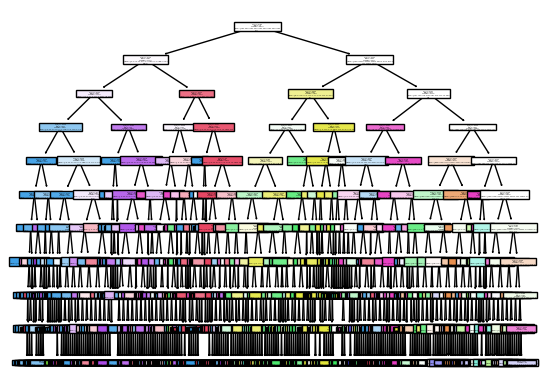

In [5]:
max_depth = 10 # # Maximum depth of the decision tree

# We call the DecisionTreeClassifier class for the Decision Tree classifier
dt_classifier = myDecisionTreeClassifier(x_train_vectorized, y_train, x_test_vectorized, y_test, max_depth) 
decision_tree_model = dt_classifier.classify()

# Visualize the tree
dt_classifier.plot_tree(decision_tree_model) 

##### Σχολιασμός Αποτελεσμάτων:
1) Βάθος Δέντρου (max_depth=10): Το βάθος του δέντρου είναι κρίσιμος παράγοντας για την απόδοση του μοντέλου. Ένα βάθος του 10 είναι μια σχετικά μέτρια τιμή, η οποία επιτρέπει στο δέντρο να μάθει αρκετές λεπτομέρειες από τα δεδομένα, αλλά μπορεί επίσης να περιορίσει την υπερπροσαρμογή (overfitting) που συχνά συμβαίνει σε πολύ βαθιά δέντρα.
2) Ακρίβεια (Accuracy 71.00%): Η ακρίβεια δείχνει το ποσοστό των σωστών προβλέψεων σε σχέση με το συνολικό αριθμό δειγμάτων. Ένας δείκτης του 71% είναι αποδεκτός για πολλές εφαρμογές αλλά δείχνει ότι υπάρχει περιθώριο βελτίωσης, ειδικά σε πιο πολύπλοκα σύνολα δεδομένων όπως τα fashion MNIST.
3) Σκορ F1 (F1 Score 0.713): Το σκορ F1 είναι ένας μέτρο της ακριβείας που λαμβάνει υπόψη τόσο την ακρίβεια όσο και την ανάκληση, παρέχοντας ένα πιο ολοκληρωμένο μέτρο της απόδοσης του ταξινομητή, ειδικά σε περιπτώσεις ανισορροπίας κλάσεων. Ένα σκορ F1 περίπου 0.713 υποδηλώνει μια καλή ισορροπία μεταξύ ακρίβειας και ανάκλησης, υποδεικνύοντας ότι το μοντέλο λειτουργεί καλά στη γενίκευση ανάμεσα στις διάφορες κατηγορίες των δεδομένων.

# RandomForestClassifier
Η κλάση RandomForestClassifier αντιπροσωπεύει έναν ταξινομητή βάσει του αλγορίθμου Random Forest, ο οποίος είναι μία μέθοδος ensemble που χρησιμοποιεί πολλαπλά δέντρα αποφάσεων για να προβλέψει την κλάση των δειγμάτων. Η κλάση αυτή αρχικοποιείται με τα δεδομένα εκπαίδευσης και δοκιμής και με τον αριθμό των δέντρων που θα χρησιμοποιηθούν στο δάσος (ensemble).

Σημαντικά στοιχεία και οι επιπτώσεις τους:
 - Αριθμός Δέντρων (n_estimators): Ο αριθμός των δέντρων είναι καθοριστικός για την απόδοση του μοντέλου. Μεγαλύτερος αριθμός δέντρων μπορεί να οδηγήσει σε καλύτερη απόδοση αλλά αυξάνει τον υπολογιστικό χρόνο και τη μνήμη που απαιτείται.
 - Εκπαίδευση και Πρόβλεψη: Το μοντέλο εκπαιδεύεται με τα δεδομένα εκπαίδευσης και στη συνέχεια χρησιμοποιείται για να προβλέψει τις ετικέτες των δεδομένων δοκιμής. Αυτή η διαδικασία περιλαμβάνει τον υπολογισμό της ακρίβειας και του σκορ F1, που είναι σημαντικοί δείκτες της ποιότητας των προβλέψεων του μοντέλου.
 - Εκτύπωση Αποτελεσμάτων: Η μέθοδος εκτυπώνει την ακρίβεια και το σκορ F1 για κάθε κλήση της μεθόδου classify, παρέχοντας άμεση ανατροφοδότηση σχετικά με την απόδοση του ταξινομητή.

In [6]:
class RandomForestClassifier:
    def __init__(self, x_train, y_train, x_test, y_test, n_estimators):
        # Initialize the RandomForest classifier with data and the number of trees
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.n_estimators = n_estimators  # Number of trees in the forest

    def classify(self):
        # Print the type of classifier being used
        print("Random Forest:")
        random_forest = ensemble.RandomForestClassifier(n_estimators=self.n_estimators)  # Create Random Forest model
        random_forest.fit(self.x_train, self.y_train)  # Train the model on the training data

        y_prediction = random_forest.predict(self.x_test)  # Predict labels for the test data
        acc = accuracy_score(self.y_test, y_prediction)  # Calculate the accuracy of predictions
        f1 = f1_score(self.y_test, y_prediction, average="weighted")  # Calculate the weighted F1 score
        print(f"accuracy: {(acc * 100):.2f}% and f1 score: {f1:.3f}\n")  # Print accuracy and F1 score
        print("==================================")


In [7]:
n_estimators = 100  # Number of trees in the forest

# We call the RandomForestClassifier class for the Random Forest classifier
rf_classifier = RandomForestClassifier(x_train_vectorized, y_train, x_test_vectorized, y_test, n_estimators)
rf_classifier.classify()

Random Forest:
accuracy: 82.11% and f1 score: 0.820



#### Σχολιασμός Αποτελεσμάτων:

- Ακρίβεια (Accuracy 82.11%): Η ακρίβεια που επιτυγχάνει το μοντέλο είναι αξιοσημείωτα υψηλή, καθώς φτάνει το 82.11%. Αυτό υποδεικνύει ότι το μοντέλο είναι αρκετά αποτελεσματικό στην ταξινόμηση των δεδομένων fashion MNIST, έχοντας εκπαιδευτεί και δοκιμαστεί σε διανυσματοποιημένες εικόνες με max pooling.
- Σκορ F1 (F1 Score 0.82): Το σκορ F1 συνδυάζει την ακρίβεια και την ανάκληση σε ένα μόνο μέτρο, προσφέροντας μια πιο ολοκληρωμένη εικόνα της απόδοσης του ταξινομητή. Ένα σκορ 0.82 είναι πολύ καλό και δείχνει ότι το μοντέλο είναι αποτελεσματικό όχι μόνο στο να προβλέπει σωστά, αλλά και στο να διατηρεί ένα υψηλό επίπεδο ανάκλησης.
- Αριθμός Δέντρων (n_estimators=100): Η επιλογή να χρησιμοποιηθούν 100 δέντρα στο τυχαίο δάσος είναι σημαντική. Περισσότερα δέντρα συνήθως βελτιώνουν την ακρίβεια του μοντέλου και μειώνουν τον κίνδυνο υπερπροσαρμογής, αλλά επίσης αυξάνουν τον υπολογιστικό φόρτο.

# SVMClassifier
Η κλάση SVMClassifier υλοποιεί έναν ταξινομητή με βάση τον αλγόριθμο Μηχανών Διανυσματικής Υποστήριξης (Support Vector Machines, SVM). Ο ταξινομητής υποστηρίζει δύο τύπους πυρήνων: γραμμικό (Linear) και (Radial Basis Function, RBF).

1) Παράμετροι C και Gamma: Οι παράμετροι αυτοί ελέγχουν την 'τιμωρία' των σφαλμάτων και την ευελιξία του πυρήνα αντίστοιχα. Η εύρεση των κατάλληλων τιμών για αυτές τις παραμέτρους είναι κρίσιμη για την απόδοση του μοντέλου.

2) Αξιολόγηση Μοντέλου: Η ακρίβεια κάθε μοντέλου αξιολογείται χρησιμοποιώντας τα δεδομένα δοκιμής. Αυτό παρέχει άμεση ανατροφοδότηση για την ποιότητα του μοντέλου.

3) Επιλογή Καλύτερων Παραμέτρων: Το μοντέλο αποθηκεύει τις παραμέτρους που επιτυγχάνουν την υψηλότερη ακρίβεια, διευκολύνοντας την επιλογή του βέλτιστου μοντέλου για χρήση σε περαιτέρω εφαρμογές.


In [8]:
class SVMClassifier:
    def __init__(self, C_values, gamma_values, x_train, y_train, x_test, y_test):
        # Initialize the SVM classifier with ranges for C and gamma, and training/testing data
        self.C_values = C_values
        self.gamma_values = gamma_values
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

    def LinearSVMClassify(self):
        # Print the type of SVM being used
        print("Linear SVM:")
        best_linear_accuracy = 0  # Initialize the best accuracy as zero
        best_C = 0  # Initialize the best C value as zero

        for C in self.C_values:  # Iterate over each C value in the provided range
            linear = SVC(kernel="linear", C=C, max_iter=500)  # Create a linear SVM with the given C
            linear.fit(self.x_train, self.y_train)  # Train the model
            accuracy = linear.score(self.x_test, self.y_test)  # Evaluate the model
            print(f"Linear SVM with C={C} accuracy:", accuracy)

            if accuracy > best_linear_accuracy:  # Update best accuracy and best C if current model is better
                best_linear_accuracy = accuracy
                best_C = C

        print("Best Linear SVM Accuracy:", best_linear_accuracy)  # Print best accuracy found
        print("Best C value:", best_C)  # Print best C value found
        print("==================================")

    def RbfSVMClassify(self):
        # Print the type of SVM being used
        print("RBF SVM:")
        best_rbf_accuracy = 0  # Initialize the best accuracy for RBF SVM
        best_C = 0  # Initialize the best C value
        best_gamma = 0  # Initialize the best gamma value

        for C in self.C_values:  # Iterate over C values
            for gamma in self.gamma_values:  # Iterate over gamma values
                rbf = SVC(kernel="rbf", C=C, gamma=gamma, max_iter=500)  # Create an RBF SVM with current C and gamma
                rbf.fit(self.x_train, self.y_train)  # Train the RBF SVM
                accuracy = rbf.score(self.x_test, self.y_test)  # Evaluate the RBF SVM
                print(f"RBF SVM with C={C}, gamma={gamma} accuracy:", accuracy)

                if accuracy > best_rbf_accuracy:  # Update the best parameters if current model is better
                    best_rbf_accuracy = accuracy
                    best_C = C
                    best_gamma = gamma

        print("Best RBF SVM Accuracy:", best_rbf_accuracy)  # Print best accuracy for RBF SVM
        print("Best C value:", best_C)  # Print best C value
        print("Best gamma value:", best_gamma)  # Print best gamma value
        print("==================================")


In [9]:
C_values = [1, 10, 100] # C values
gamma_values = [0.02, 0.1, 1] # Gamma values

# Use of classes for the SVM classifier
SVM_classifier = SVMClassifier(C_values,gamma_values, x_train_vectorized, y_train, x_test_vectorized, y_test)

SVM_classifier.LinearSVMClassify() # Run lineaer SVM model
SVM_classifier.RbfSVMClassify() # Run SVM with rbf kernel


Linear SVM:
Linear SVM with C=1 accuracy: 0.5214
Linear SVM with C=10 accuracy: 0.4384
Linear SVM with C=100 accuracy: 0.4455
Best Linear SVM Accuracy: 0.5214
Best C value: 1
RBF SVM:
RBF SVM with C=1, gamma=0.02 accuracy: 0.4948
RBF SVM with C=1, gamma=0.1 accuracy: 0.5754
RBF SVM with C=1, gamma=1 accuracy: 0.7203
RBF SVM with C=10, gamma=0.02 accuracy: 0.4869
RBF SVM with C=10, gamma=0.1 accuracy: 0.6152
RBF SVM with C=10, gamma=1 accuracy: 0.6901
RBF SVM with C=100, gamma=0.02 accuracy: 0.4827
RBF SVM with C=100, gamma=0.1 accuracy: 0.569
RBF SVM with C=100, gamma=1 accuracy: 0.6319
Best RBF SVM Accuracy: 0.7203
Best C value: 1
Best gamma value: 1


## Σχολιασμός Αποτελεσμάτων:
###### Γραμμική SVM (Linear SVM):
- Αποτελέσματα: Η καλύτερη ακρίβεια που επιτεύχθηκε είναι 52.14% με C=1. Η ακρίβεια μειώνεται καθώς αυξάνεται η τιμή του C, δείχνοντας μια πτώση στην απόδοση με την αύξηση της τιμωρίας των παραβιάσεων του περιθωρίου.
- Συμπεριφορά: Οι γραμμικές SVM είναι πιο ευαίσθητες σε δεδομένα που δεν είναι γραμμικά διαχωρίσιμα. Το χαμηλό ποσοστό ακρίβειας ενδέχεται να υποδηλώνει ότι τα δεδομένα fashion MNIST δεν είναι εύκολα διαχωρίσιμα με γραμμικά μοντέλα.
###### RBF SVM:
- Αποτελέσματα: Η καλύτερη ακρίβεια για την RBF SVM επιτεύχθηκε με C=1 και =1, φτάνοντας το 72.03%. Η ακρίβεια βελτιώνεται γενικά με την αύξηση του γ αλλά δεν είναι ομοιόμορφη καθώς αυξάνεται το C.
- Συμπεριφορά: Το μοντέλο RBF είναι ικανό να διαχειρίζεται συγκεκριμένες μη γραμμικότητες στα δεδομένα, χάρη στην ευελιξία που προσφέρει ο πυρήνας RBF. Η βελτίωση της ακρίβειας με την αύξηση του γ υποδεικνύει ότι η ενίσχυση της επίδρασης των κοντινότερων σημείων βοηθά στην καλύτερη ταξινόμηση σε αυτό το σύνολο δεδομένων.
##### Συνολικά Συμπεράσματα:
Η RBF SVM δείχνει να είναι αισθητά πιο αποτελεσματική από την Linear SVM για το συγκεκριμένο σύνολο δεδομένων, υποδεικνύοντας ότι τα δεδομένα ενδέχεται να περιέχουν σύνθετες μη γραμμικές σχέσεις που ταιριάζουν καλύτερα με έναν πυρήνα RBF. Η βελτίωση της ακρίβειας με τον πυρήνα RBF υπογραμμίζει τη σημασία της επιλογής των κατάλληλων υπερπαραμέτρων και την ανάγκη για περαιτέρω πειραματισμό και βελτιστοποίηση για την αύξηση της απόδοσης των μοντέλων SVM.



# FeedForwardNeuralNetwork
Η κλάση FeedForwardNeuralNetwork είναι μια υλοποίηση ενός απλού πολυεπίπεδου περσεπτρονικού δικτύου (MLP), σχεδιασμένου για ταξινόμηση. Αυτός ο τύπος νευρωνικού δικτύου χρησιμοποιείται ευρέως για την επίλυση προβλημάτων ταξινόμησης με βάση τα δεδομένα εισόδου και τις κατηγοριοποιημένες εξόδους.

Σημαντικά Στοιχεία και Ανάλυση:

 - Προεπεξεργασία Δεδομένων: Η μέθοδος preprocess_data μετατρέπει τις ετικέτες από απλούς αριθμούς σε διανύσματα one-hot encoding. Αυτό είναι κρίσιμο για την εκπαίδευση νευρωνικών δικτύων σε πολυκατηγορικά προβλήματα, καθώς επιτρέπει στο δίκτυο να διαχειρίζεται πολλαπλές κλάσεις με ακρίβεια.

 - Αρχιτεκτονική Δικτύου: Το δίκτυο έχει τέσσερις επίπεδα (Dense), με τα τρία πρώτα να χρησιμοποιούν την ενεργοποιητική συνάρτηση LeakyReLU, η οποία είναι μια παραλλαγή της ReLU και επιτρέπει μικρή κλίση κατά τη διάρκεια της ενεργοποίησης, αποφεύγοντας το πρόβλημα των "νεκρών νευρώνων". Το τελευταίο επίπεδο χρησιμοποιεί τη συνάρτηση ενεργοποίησης softmax, ιδανική για πολυκλασσική ταξινόμηση.

 - Σύνθεση και Εκπαίδευση: Η μέθοδος compile ρυθμίζει το μοντέλο με τον βελτιστοποιητή Adam, το οποίο είναι γνωστό για την αποτελεσματική προσαρμογή των ρυθμών μάθησης και τη χρήση του μέσου τετραγωνικού σφάλματος (Mean Squared Error) ως συνάρτησης απώλειας. Τα μετρικά περιλαμβάνουν την ακρίβεια, παρέχοντας ένα άμεσο μέτρο της απόδοσης του μοντέλου.

 - Αποτελέσματα και Οπτικοποίηση: Η μέθοδος plot_results οπτικοποιεί την εξέλιξη της απώλειας και της ακρίβειας κατά τη διάρκεια της εκπαίδευσης και της επικύρωσης, παρέχοντας κρίσιμα δεδομένα για την αξιολόγηση του υπερπροσαρμογής και της ποιότητας του μοντέλου.

In [10]:
class FeedForwardNeuralNetwork:
    def __init__(self, x_train, y_train, x_test, y_test, epochs, batch_size):
        # Initialize the neural network with training and testing data
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.epochs = epochs
        self.batch_size = batch_size

    def preprocess_data(self):
        # Convert labels to one-hot encoding
        y_train_encoded = to_categorical(self.y_train.reshape(-1, 1), num_classes=10)
        y_test_encoded = to_categorical(self.y_test.reshape(-1, 1), num_classes=10)
        return y_train_encoded, y_test_encoded

    def train(self):
        # Define a Sequential model with multiple layers using LeakyReLU activation and a softmax output layer
        model = Sequential([
            Dense(100, activation=LeakyReLU(), input_shape=(self.x_train.shape[1],)),
            Dense(100, activation=LeakyReLU()),
            Dense(50, activation=LeakyReLU()),
            Dense(10, activation="softmax")
        ])
        
        y_train_encoded, y_test_encoded = self.preprocess_data()  # Preprocess data
        model.summary()  # Print model summary

        # Compile the model with Adam optimizer, mean squared error loss, and accuracy metric
        model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[Accuracy()])
        
        # Train the model and validate it using the given data
        history = model.fit(self.x_train, y_train_encoded, epochs = self.epochs, batch_size=self.batch_size,
                            validation_data=(self.x_test, y_test_encoded), verbose=1)
        
        # Plot training results
        self.plot_results(history)  
        
        return model

    @staticmethod
    def plot_results(history):
        # Plot training and validation loss
        plt.plot(history.history["loss"], label="Training Loss")
        plt.plot(history.history["val_loss"], label="Validation Loss")
        plt.title("Training and Validation Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

        # Plot training and validation accuracy
        plt.plot(history.history["accuracy"], label="Training Accuracy")
        plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
        plt.title("Training and Validation Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()


P:\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         5,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,660 (80.70 KB)

 Trainable params: 20,660 (80.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0464 - val_accuracy: 0.0000e+00 - val_loss: 0.0346
Epoch 2/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0333 - val_accuracy: 0.0000e+00 - val_loss: 0.0330
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0315 - val_accuracy: 0.0000e+00 - val_loss: 0.0316
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0305 - val_accuracy: 0.0000e+00 - val_loss: 0.0312
Epoch 5/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0297 - val_accuracy: 0.0000e+00 - val_loss: 0.0305
Epoch 6/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0287 - val_accuracy: 0.0000e+00 - val_loss: 0.0317
Epoch 7/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 3.0096e-06 - loss: 0.0284 - val_accuracy: 1.0000e-05 - val_loss: 0.0298
Epoch 8/100
1200/1200 ━━━━━

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0053 - loss: 0.0192 - val_accuracy: 0.0054 - val_loss: 0.0273
Epoch 98/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0054 - loss: 0.0186 - val_accuracy: 0.0047 - val_loss: 0.0272
Epoch 99/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0058 - loss: 0.0185 - val_accuracy: 0.0050 - val_loss: 0.0270
Epoch 100/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0061 - loss: 0.0186 - val_accuracy: 0.0063 - val_loss: 0.0271


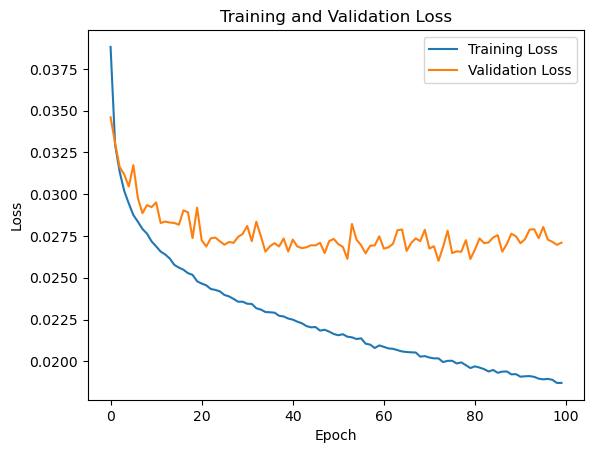

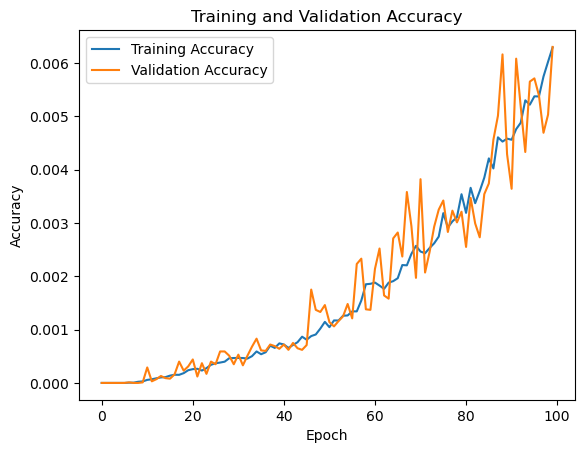

<Sequential name=sequential, built=True>

In [11]:
# Use of the FeedForwardNeuralNetwork class
epochs = 100 
batch_size = 50
ffnn = FeedForwardNeuralNetwork(x_train_vectorized, y_train, x_test_vectorized, y_test, epochs, batch_size)
ffnn.train()

### Σχολιασμός των Αποτελεσμάτων:
###### Απώλεια Εκπαίδευσης και Επικύρωσης:
- Απώλεια Εκπαίδευσης (Training Loss): Το διάγραμμα δείχνει μια σταθερή και συνεχή μείωση στην απώλεια εκπαίδευσης καθ' όλη τη διάρκεια των 100 εποχών, ξεκινώντας από τιμές γύρω στο 0.035 και φτάνοντας στο 0.02. Αυτό υποδεικνύει ένα αποτελεσματικό μάθησης περιβάλλον όπου το μοντέλο βελτιώνεται σταδιακά με τον καιρό.
- Απώλεια Επικύρωσης (Validation Loss): Η απώλεια επικύρωσης μειώνεται αρχικά αλλά στη συνέχεια παρουσιάζει σημαντικές διακυμάνσεις και μια γενική αύξηση, ειδικά μετά την εποχή 20. Αυτό υποδεικνύει έναν δυνητικό κίνδυνο υπερπροσαρμογής όπου το μοντέλο αρχίζει να "μαθαίνει" τις ειδικές ιδιαιτερότητες του σετ εκπαίδευσης σε βάρος της γενίκευσης σε νέα δεδομένα.
###### Ακρίβεια Εκπαίδευσης και Επικύρωσης:
- Ακρίβεια Εκπαίδευσης (Training Accuracy): Η ακρίβεια της εκπαίδευσης παρουσιάζει σταδιακή αύξηση από την εποχή 0 έως την εποχή 100, ωστόσο, το γενικό επίπεδο της ακρίβειας είναι πολύ χαμηλό (κοντά στο 0.006). Αυτό ενδεχομένως υποδεικνύει προβλήματα στην κλιμάκωση της εξόδου ή στην επιλογή της μετρικής ακρίβειας.
- Ακρίβεια Επικύρωσης (Validation Accuracy): Παρόμοια με την ακρίβεια εκπαίδευσης, η ακρίβεια επικύρωσης αυξάνεται σταδιακά με σημαντικές διακυμάνσεις. Το γεγονός ότι και οι δύο ακρίβειες είναι χαμηλές μπορεί να υποδεικνύει ένα θέμα στην κατάλληλη προσαρμογή των δεδομένων ή την ανάγκη για τροποποίηση της δομής του δικτύου.
##### Συμπεράσματα:
Τα διαγράμματα και τα αποτελέσματα υποδεικνύουν ότι υπάρχει σημαντικός χώρος για βελτίωση. Η χαμηλή ακρίβεια μπορεί να διορθωθεί με αναθεώρηση της αρχιτεκτονικής του νευρωνικού δικτύου, την επανεξέταση των υπερπαραμέτρων και τον καθορισμό των σωστών μετρικών ακρίβειας για πολυκατηγορική ταξινόμηση. Η υπερπροσαρμογή που ενδεχομένως εμφανίζεται στον έλεγχο επικύρωσης πρέπει επίσης να αντιμετωπιστεί μέσω τεχνικών όπως το early stopping ή η ρύθμιση των στρωμάτων Dropout για να βελτιωθεί η γενίκευση του μοντέλου.


# CNNModel
Η κλάση CNNModel είναι σχεδιασμένη για την κατασκευή, εκπαίδευση και αξιολόγηση συνελικτικών νευρωνικών δικτύων (CNNs) μέσω της διεπαφής Keras, της βιβλιοθήκης TensorFlow. Αυτή η κλάση περιλαμβάνει πολλές λειτουργίες όπως προετοιμασία δεδομένων, κατασκευή μοντέλου, εκπαίδευση, και οπτικοποίηση αποτελεσμάτων. Παρακάτω, περιγράφω κάθε συστατικό και τον ρόλο του μέσα στην κλάση:

###  Αρχικοποίηση Κλάσης
-  __init__: Ο κατασκευαστής δέχεται πολλαπλές παραμέτρους περιλαμβάνοντας διαχωρισμένα σύνολα δεδομένων (x_train, y_train, x_test, y_test), ρυθμίσεις μοντέλου (input_shape, filters), και ρυθμίσεις εκπαίδευσης (epochs, batch_size). Εδώ, input_shape αναφέρεται στις διαστάσεις των εισαγόμενων εικόνων, filters είναι μια λίστα ακεραίων που δηλώνουν τον αριθμό των φίλτρων σε κάθε συνελικτικό επίπεδο, epochs δηλώνουν τον αριθμό των κύκλων εκπαίδευσης, και batch_size καθορίζει τον αριθμό των δειγμάτων που επεξεργάζεται πριν ανανεωθούν οι εσωτερικοί παράμετροι του μοντέλου.

### Προετοιμασία Δεδομένων
- preprocess_data: Αυτή η μέθοδος μετατρέπει τις ετικέτες (y_train και y_test) σε μορφή one-hot encoding χρησιμοποιώντας την to_categorical, κάτι απαραίτητο για την πολυκατηγορική ταξινόμηση στα νευρωνικά δίκτυα. Αυτή η μέθοδος είναι κρίσιμη για την προετοιμασία των στοχευμένων δεδομένων για να αντιστοιχίσουν στη δομή εξόδου που αναμένεται από τη συνάρτηση ενεργοποίησης softmax στο τελευταίο επίπεδο του δικτύου.

### Κατασκευή Μοντέλου
- build_model: Δέχεται filters ως παράμετρο για να δημιουργήσει δυναμικά μια δομή CNN. Το μοντέλο αποτελείται από διαδοχικά επίπεδα περιλαμβάνοντας πολλαπλά επίπεδα Conv2D για την εξαγωγή χαρακτηριστικών από εικόνες, MaxPooling2D για τη μείωση των χωρικών διαστάσεων (ενισχύοντας έτσι τη ροπή των χαρακτηριστικών και μειώνοντας τον υπολογιστικό φόρτο), και Flatten για τη μετατροπή του μειωμένου χάρτη χαρακτηριστικών σε μια στήλη που τροφοδοτείται στα πυκνά επίπεδα. Τα τελικά επίπεδα περιλαμβάνουν ένα Dense επίπεδο με dropout για την ρύθμιση και μετά ένα επίπεδο Dense με συνάρτηση ενεργοποίησης softmax, που χρησιμοποιείται για την ταξινόμηση.

### Συναρμολόγηση και Εκπαίδευση Μοντέλου
- compile_and_train_model: Συναρμολογεί το μοντέλο χρησιμοποιώντας τον βελτιστοποιητή Adam και την απώλεια categorical cross-entropy, και στη συνέχεια εκπαιδεύει το μοντέλο στα δεδομένα εκπαίδευσης και επικυρώνει την απόδοσή του στα δεδομένα δοκιμής. Αυτή η μέθοδος χρησιμοποιεί την ιστορία εκπαίδευσης για να παρακολουθεί μετρήσεις όπως η απώλεια και η ακρίβεια καθ' όλη τη διάρκεια των εποχών.

### Οπτικοποίηση Αποτελεσμάτων
- plot_results: Οπτικοποιεί την ιστορία εκπαίδευσης, απεικονίζοντας τόσο την ακρίβεια όσο και την απώλεια για τα σύνολα εκπαίδευσης και επικύρωσης κατά τη διάρκεια των εποχών. Αυτή η οπτικοποίηση βοηθά στην αξιολόγηση της απόδοσης του μοντέλου, ιδιαίτερα για τον έλεγχο προβλημάτων όπως υπερεκπαίδευση ή υποεκπαίδευση με βάση την απόκλιση μεταξύ των μετρήσεων εκπαίδευσης και επικύρωσης.

### Έλεγχος Εκτέλεσης
- run: Οργανώνει όλη διαδικασία επαναλαμβάνοντας διαφορετικές ρυθμίσεις των filters και activation functions που ορίζονται κατά την αρχικοποίηση. Για κάθε ρύθμιση, κατασκευάζει ένα μοντέλο, το συναρμολογεί και το εκπαιδεύει, και τέλος απεικονίζει τα αποτελέσματα. Αυτή η μέθοδος επιτρέπει το πειραματισμό με διαφορετικές αρχιτεκτονικές μοντέλων αναπροσαρμόζοντας τον αριθμό των φίλτρων στα συνελικτικά επίπεδα.

In [4]:
class CNNModel:
    def __init__(self, input_shape, x_train, y_train, x_test, y_test, activation, filters, epochs, batch_size):
        self.input_shape = input_shape
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.epochs = epochs
        self.batch_size = batch_size
        self.activation = activation
        self.filter = filter
        
    def preprocess_data(self):
        # Convert labels to one-hot encoding
        y_train_encoded = to_categorical(self.y_train.reshape(-1, 1), num_classes=10)
        y_test_encoded = to_categorical(self.y_test.reshape(-1, 1), num_classes=10)
        return y_train_encoded, y_test_encoded

    def build_model(self, filters):
        model = Sequential([
            Conv2D(filters[0], kernel_size=(3, 3),activation = self.activation,input_shape = self.input_shape),
            Conv2D(filters[1], kernel_size=(3, 3),activation = self.activation),
            MaxPooling2D((2, 2)),
            Conv2D(filters[2], kernel_size=(3, 3),activation = self.activation),
            Flatten(),
            Dense(100),
            Dropout(0.3),
            Dense(10, activation='softmax')
        ])
        return model

    def compile_and_train_model(self, model):
      
        y_train_encoded, y_test_encoded = self.preprocess_data()  # Preprocess data
        
        model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy()])
        
        history = model.fit(self.x_train, y_train_encoded, epochs=self.epochs, batch_size=self.batch_size,
                            validation_data=(self.x_test,  y_test_encoded), verbose=1)
        return history

    def plot_results(self, history, title_suffix):
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history["loss"], label="Training Loss")
        plt.plot(history.history["val_loss"], label="Validation Loss")
        plt.title(f"Training and Validation Loss for {title_suffix}")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history["categorical_accuracy"], label="Training Accuracy")
        plt.plot(history.history["val_categorical_accuracy"], label="Validation Accuracy")
        plt.title(f"Training and Validation Accuracy for {title_suffix}")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()

        plt.show()

    def run(self):      
        model = self.build_model(filter)
        model.summary()
            
        history = self.compile_and_train_model(model)
        self.plot_results(history, filter)

        print("========================")

C:\Users\Thomas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        80,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,902 (323.84 KB)

 Trainable params: 82,902 (323.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - categorical_accuracy: 0.7617 - loss: 0.6743 - val_categorical_accuracy: 0.8524 - val_loss: 0.4177
Epoch 2/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.8592 - loss: 0.4022 - val_categorical_accuracy: 0.8713 - val_loss: 0.3663
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.8769 - loss: 0.3541 - val_categorical_accuracy: 0.8731 - val_loss: 0.3631
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.8843 - loss: 0.3300 - val_categorical_accuracy: 0.8829 - val_loss: 0.3365
Epoch 5/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.8912 - loss: 0.3102 - val_categorical_accuracy: 0.8780 - val_loss: 0.3477
Epoch 6/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.8952 - loss: 0.2981 - val_categorical_accuracy: 0.8803 - val_loss: 0.3423
Epoch 7/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_a

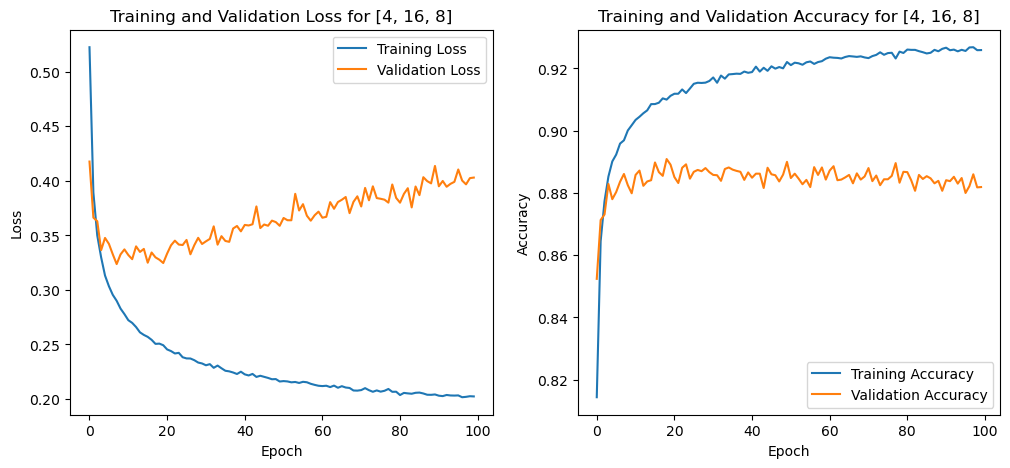

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 22)     │         1,606 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       220,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,036 (875.14 KB)

 Trainable params: 224,036 (875.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categorical_accuracy: 0.7776 - loss: 0.6302 - val_categorical_accuracy: 0.8613 - val_loss: 0.4051
Epoch 2/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_accuracy: 0.8707 - loss: 0.3740 - val_categorical_accuracy: 0.8698 - val_loss: 0.3708
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_accuracy: 0.8770 - loss: 0.3470 - val_categorical_accuracy: 0.8802 - val_loss: 0.3440
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_accuracy: 0.8840 - loss: 0.3275 - val_categorical_accuracy: 0.8783 - val_loss: 0.3417
Epoch 5/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_accuracy: 0.8888 - loss: 0.3096 - val_categorical_accuracy: 0.8750 - val_loss: 0.3549
Epoch 6/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_accuracy: 0.8918 - loss: 0.2998 - val_categorical_accuracy: 0.8815 - val_loss: 0.3379
Epoch 7/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_a

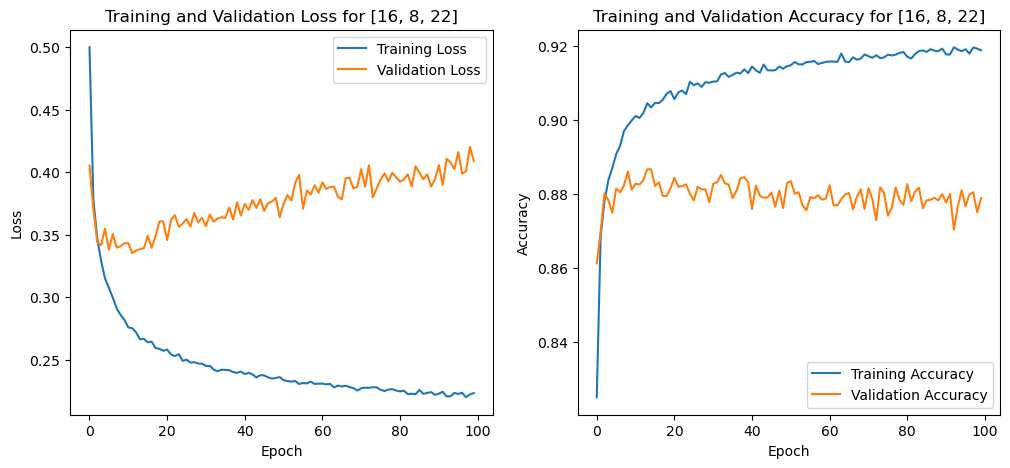

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 16)     │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        80,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,902 (323.84 KB)

 Trainable params: 82,902 (323.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - categorical_accuracy: 0.7241 - loss: 0.7606 - val_categorical_accuracy: 0.8534 - val_loss: 0.4094
Epoch 2/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - categorical_accuracy: 0.8652 - loss: 0.3797 - val_categorical_accuracy: 0.8753 - val_loss: 0.3522
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - categorical_accuracy: 0.8798 - loss: 0.3342 - val_categorical_accuracy: 0.8761 - val_loss: 0.3444
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_accuracy: 0.8917 - loss: 0.3020 - val_categorical_accuracy: 0.8880 - val_loss: 0.3118
Epoch 5/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - categorical_accuracy: 0.8992 - loss: 0.2818 - val_categorical_accuracy: 0.8950 - val_loss: 0.2948
Epoch 6/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.8996 - loss: 0.2766 - val_categorical_accuracy: 0.8858 - val_loss: 0.3127
Epoch 7/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - categorical_a

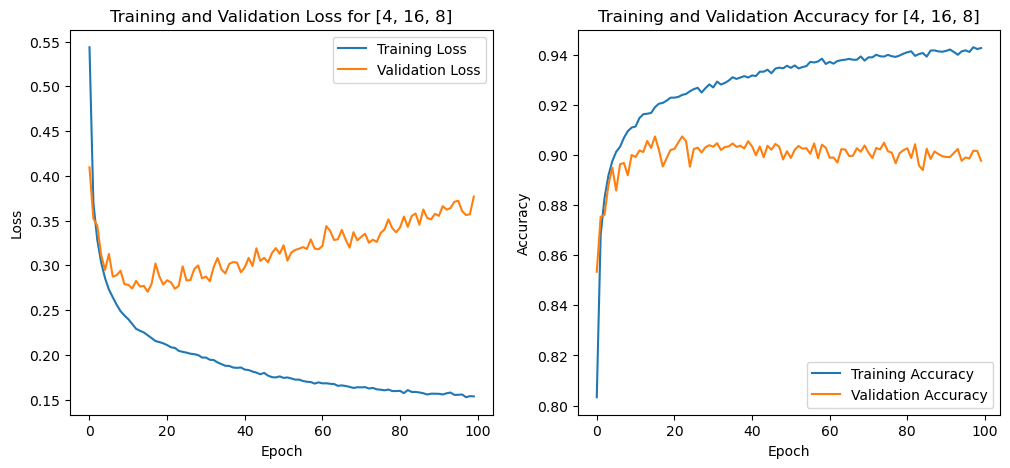

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 10, 10, 22)     │         1,606 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       220,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,036 (875.14 KB)

 Trainable params: 224,036 (875.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categorical_accuracy: 0.7704 - loss: 0.6428 - val_categorical_accuracy: 0.8681 - val_loss: 0.3588
Epoch 2/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_accuracy: 0.8806 - loss: 0.3342 - val_categorical_accuracy: 0.8898 - val_loss: 0.3108
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_accuracy: 0.8974 - loss: 0.2822 - val_categorical_accuracy: 0.9024 - val_loss: 0.2762
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.9078 - loss: 0.2531 - val_categorical_accuracy: 0.9031 - val_loss: 0.2749
Epoch 5/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_accuracy: 0.9158 - loss: 0.2315 - val_categorical_accuracy: 0.9029 - val_loss: 0.2766
Epoch 6/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_accuracy: 0.9201 - loss: 0.2178 - val_categorical_accuracy: 0.9073 - val_loss: 0.2634
Epoch 7/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_a

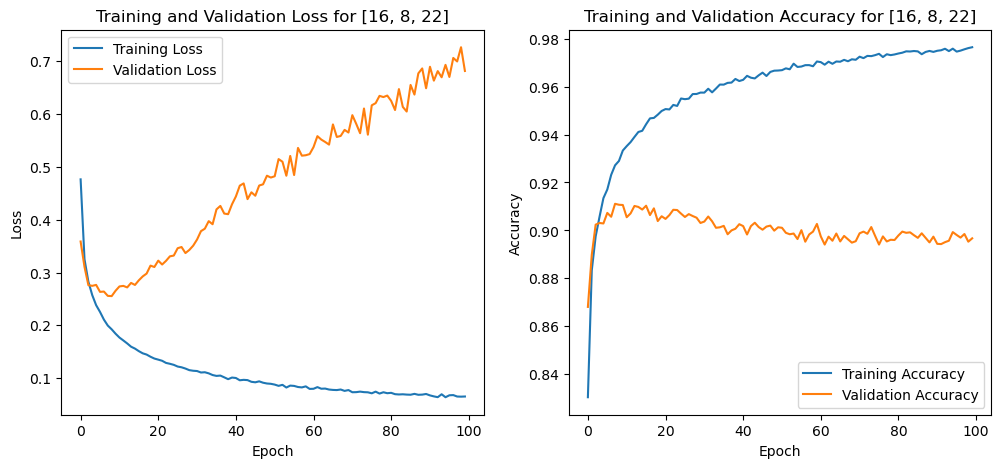

In [5]:
input_shape=(28, 28, 1)
filters = [ [4, 16, 8], [16, 8, 22] ] 
epochs=100 
batch_size=50
activations = [None,"relu"]
for activation in activations:
    for filter in filters:
        cnn_model = CNNModel(input_shape, x_train_images, y_train, x_test_images, y_test,activation,filter, epochs, batch_size)
        cnn_model.run()

## Ανάλυση Αποτελεσμάτων
###### Χωρίς ReLU:
1) Φίλτρα [4, 16, 8]:

- Εκπαίδευση Ακρίβειας: Αύξηση από 76.17% σε 92.91% κατά τη διάρκεια των 100 εποχών.
- Επικύρωση Ακρίβειας: Σταθεροποιήθηκε σε περίπου 88.20%.
- Παρατηρήσεις: Υψηλή εκπαιδευτική ακρίβεια σε σύγκριση με την επικύρωση, δείχνοντας ένδειξη υπερεκπαίδευσης.

2) Φίλτρα [16, 8, 22]:

- Εκπαίδευση Ακρίβειας: Αύξηση από 77.76% σε 92.07%.
- Επικύρωση Ακρίβειας: Σταθεροποιήθηκε σε περίπου 88.05%.
- Παρατηρήσεις: Ανάλογη υπερεκπαίδευση όπως και με το πρώτο σετ φίλτρων.

###### Με ReLU:
1) Φίλτρα [4, 16, 8]:

- Εκπαίδευση Ακρίβειας: Αύξηση από 72.41% σε 94.38%.
- Επικύρωση Ακρίβειας: Σταθεροποιήθηκε σε περίπου 89.90%.
- Παρατηρήσεις: Υψηλότερη αύξηση και καλύτερη απόδοση στην επικύρωση σε σχέση με την περίπτωση χωρίς ReLU, δείχνοντας το οφέλος της ReLU στη βελτίωση του μοντέλου.

2) Φίλτρα [16, 8, 22]:

- Εκπαίδευση Ακρίβειας: Αύξηση από 77.04% σε 97.80%.
- Επικύρωση Ακρίβειας: Σταθεροποιήθηκε σε περίπου 89.82%.
- Παρατηρήσεις: Ακόμη μεγαλύτερη αύξηση στην εκπαίδευση και ελαφρώς καλύτερη στην επικύρωση. Η αύξηση των φίλτρων βοήθησε το μοντέλο να αποκτήσει πιο περίπλοκα χαρακτηριστικά.

### Συγκρίσεις
- Με Χρήση ReLU έναντι Χωρίς ReLU: Τα μοντέλα με ReLU έδειξαν καλύτερη εκπαίδευση και επικύρωση. Η ReLU βοηθά στην αποφυγή του προβλήματος των "νεκρών νευρώνων" που μπορεί να συμβεί με άλλες συναρτήσεις ενεργοποίησης όπως το sigmoid ή tanh, επιτρέποντας στο μοντέλο να μαθαίνει αποτελεσματικότερα.
- Φίλτρα [4, 16, 8] έναντι [16, 8, 22]: Μεγαλύτερα φίλτρα και η αύξηση τους φαίνεται να βελτιώνουν την απόδοση του μοντέλου, επιτρέποντας την ανίχνευση πιο λεπτομερών και πολύπλοκων χαρακτηριστικών από τις εικόνες.

Συνοπτικά, τα μοντέλα με ReLU και μεγαλύτερα φίλτρα έδειξαν την καλύτερη απόδοση τόσο στην εκπαίδευση όσο και στην επικύρωση, ενώ είχαν μικρότερο κίνδυνο υπερεκπαίδευσης σε σχέση με τα μοντέλα χωρίς ReLU.